In [1]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import roc_auc_score as auc
#from sklearn.metrics import plot_confusion_matrix as pcm
#from sklearn.metrics import plot_precision_recall_curve as ppc
#from sklearn.metrics import plot_roc_curve as prc
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.model_selection import cross_val_score as cv
from sklearn.svm import LinearSVC as linSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import fbeta_score
from sklearn.model_selection import StratifiedKFold
import pandas as pd
from matplotlib import pyplot as plt  
import numpy as np
from sklearn.preprocessing import Normalizer as norm
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.utils.class_weight import compute_class_weight
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.cluster import MeanShift
from sklearn.neural_network import MLPClassifier

In [2]:
#loading data
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
y_train = y_train['Expected']
y_test = pd.read_csv('y_test_pred_dectree_md2.csv')
X_test = pd.read_csv('X_test.csv')
y_test = y_test['Predicted']
df = X_train

In [3]:
def prep_func(df):
    df_noId = df.drop(['Id'], axis=1)
    sparse_attributes = ['ab_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'cr_000']
    histo_features = ['ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'cn_000', 'cn_001', 'cn_002', 'cn_003', 'cn_004', 'cn_005', 'cn_006', 'cn_007', 'cn_008', 'cn_009', 'cs_000', 'cs_001', 'cs_002', 'cs_003', 'cs_004', 'cs_005', 'cs_006', 'cs_007', 'cs_008', 'cs_009', 'ee_000', 'ee_001', 'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008', 'ee_009']
    histo_dic = {'histo_ag':['ag_000','ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009'], 'histo_ay':['ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009'], 'histo_az':['az_000','az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009'],'histo_ba':['ba_000','ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009'],'histo_cn':['cn_000','cn_001', 'cn_002', 'cn_003', 'cn_004', 'cn_005', 'cn_006', 'cn_007', 'cn_008', 'cn_009'],'histo_cs' :['cs_000','cs_001', 'cs_002', 'cs_003', 'cs_004', 'cs_005', 'cs_006', 'cs_007', 'cs_008', 'cs_009'],'histo_ee': ['ee_000','ee_001', 'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008', 'ee_009']}
    
    df_lessAtt = df_noId.drop(sparse_attributes, axis=1)
    new_atts_ordinal=[]
    
    for i in histo_dic:  
        #att1=df[histo_dic[i]].max(axis=1)
        att2=df[histo_dic[i]].idxmax(axis="columns")

        #name1 = i + '_val'
        name2 = i + '_mode'
        #se1 = pd.Series(att1)
        se2 = pd.Series(att2)
        #df_lessAtt[name1] = se1.values
        df_lessAtt[name2] = se2.values
        new_atts_ordinal.append(name2)
    
    df_lessAtt[new_atts_ordinal] = df_lessAtt[new_atts_ordinal].fillna('000')
    
    for i in new_atts_ordinal:
        ss=[]
        for j in range(len(df_lessAtt)):
            s=df_lessAtt[i].loc[j][-1]
            ss.append(s)
        df_lessAtt[i]=ss
    
    #df_noHisto = df_lessAtt.drop(histo_features, axis=1)
    
    df_imp1=df_lessAtt.fillna(df_lessAtt.iloc[:,0:92].mean())
    df_imp2 = df_imp1.fillna(0)
    df_f = df_imp2
    return df_f

In [4]:
X_train_p = prep_func(X_train)

In [5]:
X_test_p = prep_func(X_test)

In [6]:
X_trainS, X_testS, y_trainS, y_testS = train_test_split(X_train_p, y_train, test_size=0.33, random_state=42)

In [7]:
scores=[]

In [52]:
clf = GaussianNB()
pipe = make_pipeline(StandardScaler(), clf)
y_predS = pipe.fit( X_trainS, y_trainS).predict(X_testS)
f_score = fbeta_score(y_testS, y_predS, beta = 3)
print(f_score)

0.747795414462081


0.5109489051094891
0.6470588235294117
0.6877865777407253
0.6586077532305128
0.6763485477178423
0.6743897393462971


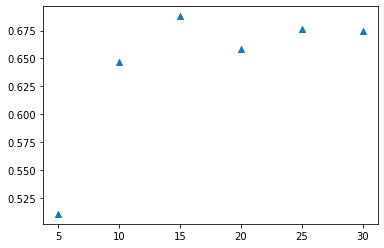

In [8]:
# DTC: Tuning max_depth -- (without class_weight)
max_depth_val = [5, 10, 15, 20, 25, 30]
scores = []
for i in max_depth_val:
    clf = DTC(criterion='gini', splitter='best', max_depth=i, random_state=0)
    pipe = make_pipeline(StandardScaler(), clf)
    y_predS = pipe.fit( X_trainS, y_trainS).predict(X_testS)
    f_score = fbeta_score(y_testS, y_predS, beta = 3)
    mean = np.mean(f_score)
    scores.append(f_score)
    print(f_score)
    
max_depth_val = [5, 10, 15, 20, 25, 30]
plt.scatter(max_depth_val,scores, marker='^')
plt.show()

In [41]:
# DTC: Tuned -- (without class_weight)
clf = DTC(criterion='gini', splitter='best', max_depth=15, random_state=0)
pipe = make_pipeline(StandardScaler(), clf)
y_predS = pipe.fit( X_trainS, y_trainS).predict(X_testS)
f_score = fbeta_score(y_testS, y_predS, beta = 3)
mean = np.mean(f_score)
print(f_score)

0.6877865777407253


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6686291000841044


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6686291000841044


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6686291000841044


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6686291000841044


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6686291000841044


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6686291000841044


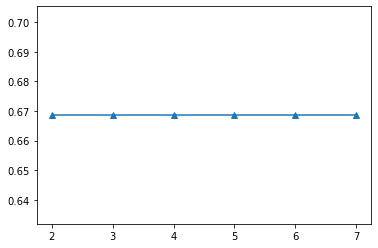

In [9]:
#logreg: tunin tol -- (without class_weight)
tol_val = [0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001]
scores = []
for i in tol_val:
    clf = LogisticRegression(penalty='l2', dual=False, tol=i, C=1.0, fit_intercept=True, intercept_scaling=1, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
    pipe = make_pipeline(StandardScaler(), clf)
    y_predS = pipe.fit( X_trainS, y_trainS).predict(X_testS)
    f_score = fbeta_score(y_testS, y_predS, beta = 3)
    mean = np.mean(f_score)
    scores.append(f_score)
    print(f_score)
    
tol_axis = [2, 3, 4, 5, 6, 7]
plt.errorbar(tol_axis,scores, marker='^')
plt.show()

0.5247311827956989
0.6194314806957997


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6697556866048863


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6686291000841044


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6719865602687947


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6683480453972258


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6683480453972258


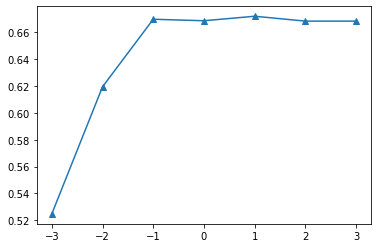

In [10]:
#logreg: tunin C -- (without class_weight)
c_val = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
scores = []
for i in c_val:
    clf = LogisticRegression(penalty='l2', dual=False, C=i, fit_intercept=True, intercept_scaling=1, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
    pipe = make_pipeline(StandardScaler(), clf)
    y_predS = pipe.fit( X_trainS, y_trainS).predict(X_testS)
    f_score = fbeta_score(y_testS, y_predS, beta = 3)
    mean = np.mean(f_score)
    scores.append(f_score)
    print(f_score)
    
c_axis = [-3, -2, -1, 0, 1, 2, 3]
plt.errorbar(c_axis,scores, marker='^')
plt.show()

In [44]:
# logreg: Tuned -- (without class_weight)
clf = LogisticRegression(C= 10)
pipe = make_pipeline(StandardScaler(), clf)
y_predS = pipe.fit( X_trainS, y_trainS).predict(X_testS)
f_score = fbeta_score(y_testS, y_predS, beta = 3)
mean = np.mean(f_score)
print(f_score)

C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6719865602687947


0.6020495303159693


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.6485799067401441


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.6675116180819602


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.6978687839531967


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.4941985388912764


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.5111683848797252


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.6882081409987411


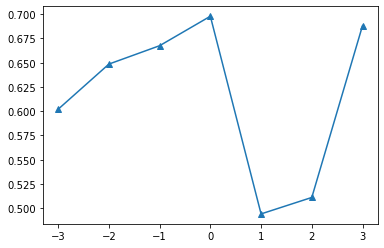

In [11]:
#linSVC: tunin C -- (without class_weight)
c_val = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
scores = []
for i in c_val:
    clf = linSVC(C= i)
    pipe = make_pipeline(StandardScaler(), clf)
    y_predS = pipe.fit( X_trainS, y_trainS).predict(X_testS)
    f_score = fbeta_score(y_testS, y_predS, beta = 3)
    mean = np.mean(f_score)
    scores.append(f_score)
    print(f_score)
    
c_axis = [-3, -2, -1, 0, 1, 2, 3]
plt.errorbar(c_axis,scores, marker='^')
plt.show()

C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.7160699417152373


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.7393638992152003


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.6117247238742566


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.6641445985708281


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.7645134914145544


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.6753355704697985


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.6466610312764158


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.6466610312764158


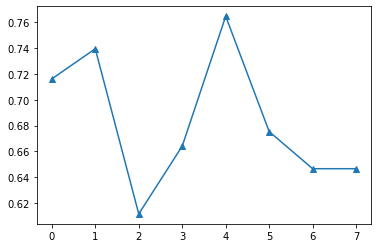

In [12]:
#linSVC: tuning tol -- (without class_weight)
tol_val = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001]
scores = []
for i in tol_val:
    clf = linSVC(tol= i)
    pipe = make_pipeline(StandardScaler(), clf)
    y_predS = pipe.fit( X_trainS, y_trainS).predict(X_testS)
    f_score = fbeta_score(y_testS, y_predS, beta = 3)
    mean = np.mean(f_score)
    scores.append(f_score)
    print(f_score)
    
tol_axis = [0, 1, 2, 3, 4, 5, 6, 7]
plt.errorbar(tol_axis,scores, marker='^')
plt.show()

In [46]:
#linSVC High C -> different scores
for i in range(5):
    clf = linSVC(C=1, tol = 0.0001)
    pipe = make_pipeline(StandardScaler(), clf)
    y_predS = pipe.fit( X_trainS, y_trainS).predict(X_testS)
    f_score = fbeta_score(y_testS, y_predS, beta = 3)
    print(f_score)

C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.6170212765957447


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.6817231283981597


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.697286012526096


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.6159728122344945


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.6912442396313364


In [47]:
#linSVC low C -> stable prediction
for i in range(5):
    clf = linSVC(C=0.01, tol = 0.0001)
    pipe = make_pipeline(StandardScaler(), clf)
    y_predS = pipe.fit( X_trainS, y_trainS).predict(X_testS)
    f_score = fbeta_score(y_testS, y_predS, beta = 3)
    print(f_score)

C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.6485799067401441


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.6485799067401441


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.6485799067401441


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.6485799067401441


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.6485799067401441


0.7842453816660858
0.7355072463768116
0.67680608365019
0.6679611650485437
0.6614481409001955
0.6326611308817716


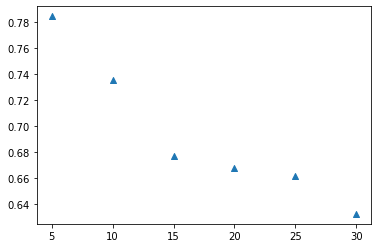

In [48]:
# DTC: Tuning max_depth -- (with class_weight)
max_depth_val = [5, 10, 15, 20, 25, 30]
scores = []
for i in max_depth_val:
    clf = DTC(criterion='gini', splitter='best', max_depth=i, random_state=0, class_weight= {1:55})
    pipe = make_pipeline(StandardScaler(), clf)
    y_predS = pipe.fit( X_trainS, y_trainS).predict(X_testS)
    f_score = fbeta_score(y_testS, y_predS, beta = 3)
    mean = np.mean(f_score)
    scores.append(f_score)
    print(f_score)
    
max_depth_val = [5, 10, 15, 20, 25, 30]
plt.scatter(max_depth_val,scores, marker='^')
plt.show()

In [49]:
# DTC: Tuned -- (with class_weight)
clf = DTC(criterion='gini', splitter='best', max_depth=5, random_state=0, class_weight= {1:55})
pipe = make_pipeline(StandardScaler(), clf)
y_predS = pipe.fit( X_trainS, y_trainS).predict(X_testS)
f_score = fbeta_score(y_testS, y_predS, beta = 3)
mean = np.mean(f_score)
print(f_score)

0.7842453816660858


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8138658628485306


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8138658628485306


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8138658628485306


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8138658628485306


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8138658628485306


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8138658628485306


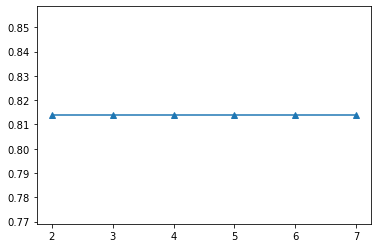

In [18]:
#logreg: tunin tol -- (with class_weight)
tol_val = [0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001]
scores = []
for i in tol_val:
    clf = LogisticRegression(penalty='l2', dual=False, tol=i, C=1.0, fit_intercept=True, intercept_scaling=1, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None, class_weight= {1:55})
    pipe = make_pipeline(StandardScaler(), clf)
    y_predS = pipe.fit( X_trainS, y_trainS).predict(X_testS)
    f_score = fbeta_score(y_testS, y_predS, beta = 3)
    mean = np.mean(f_score)
    scores.append(f_score)
    print(f_score)
    
tol_axis = [2, 3, 4, 5, 6, 7]
plt.errorbar(tol_axis,scores, marker='^')
plt.show()

0.8225268618006669


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8171641791044776


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8245481927710843


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8138658628485306


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8164033107599697


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8185590343266692


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8129469326307867


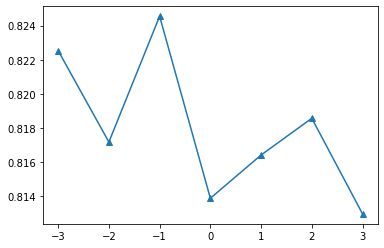

In [19]:
#logreg: tuning C -- (with class_weight)
c_val = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
scores = []
for i in c_val:
    clf = LogisticRegression(penalty='l2', dual=False, C=i, fit_intercept=True, intercept_scaling=1, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None, class_weight= {1:55})
    pipe = make_pipeline(StandardScaler(), clf)
    y_predS = pipe.fit( X_trainS, y_trainS).predict(X_testS)
    f_score = fbeta_score(y_testS, y_predS, beta = 3)
    mean = np.mean(f_score)
    scores.append(f_score)
    print(f_score)
    
c_axis = [-3, -2, -1, 0, 1, 2, 3]
plt.errorbar(c_axis,scores, marker='^')
plt.show()

In [62]:
# logreg: Tuned -- (with class_weight)
clf = LogisticRegression(C=0.1, class_weight= {1:55})
pipe = make_pipeline(StandardScaler(), clf)
y_predS = pipe.fit( X_trainS, y_trainS).predict(X_testS)
f_score = fbeta_score(y_testS, y_predS, beta = 3)
mean = np.mean(f_score)
print(f_score)

C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8245481927710843


In [63]:
y_pred = pipe.fit(X_train_p, y_train).predict(X_test_p)
y_pred_sol = {}
y_pred_sol['Id']=list(range(17100))
y_pred_sol['Predicted']=list((y_pred))
df = pd.DataFrame(y_pred_sol, columns = ['Id', 'Predicted'])
df.to_csv('momo521.csv', index=False)

C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7818242565987303
0.8232267548695333


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8211473565804273


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8123354644603235


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.7806983130639467


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.6175972927241963


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.5362505362505362


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.5096882898062342


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.7628784899724734


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.7506053268765133


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.405936272370144


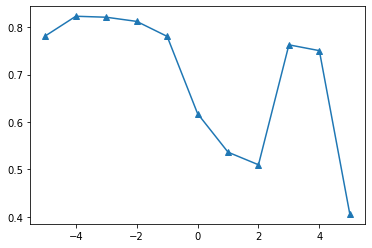

In [40]:
#linSVC: tunin C -- (with class_weight)
c_val = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
scores = []
for i in c_val:
    clf = linSVC(C= i, class_weight= {1:55})
    pipe = make_pipeline(StandardScaler(), clf)
    y_predS = pipe.fit( X_trainS, y_trainS).predict(X_testS)
    f_score = fbeta_score(y_testS, y_predS, beta = 3)
    mean = np.mean(f_score)
    scores.append(f_score)
    print(f_score)
    
c_axis = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
plt.errorbar(c_axis,scores, marker='^')
plt.show()

C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.6929460580912864


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.7664233576642334


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.7256420709335507


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.7318070318887979


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.6451612903225807


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.7551766138855055


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.7571486105517519


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.7354149548069022


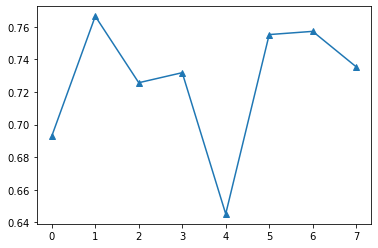

In [21]:
#linSVC: tunin tol -- (with class_weight)
tol_val = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001]
scores = []
for i in tol_val:
    clf = linSVC(tol= i, class_weight= {1:55})
    pipe = make_pipeline(StandardScaler(), clf)
    y_predS = pipe.fit( X_trainS, y_trainS).predict(X_testS)
    f_score = fbeta_score(y_testS, y_predS, beta = 3)
    mean = np.mean(f_score)
    scores.append(f_score)
    print(f_score)
    
tol_axis = [0, 1, 2, 3, 4, 5, 6, 7]
plt.errorbar(tol_axis,scores, marker='^')
plt.show()

In [59]:
#linSVC: tuned -- (with class_weight)
for i in range(5):
    clf = linSVC(C=0.0001, class_weight = {1:55})
    pipe = make_pipeline(StandardScaler(), clf)
    y_predS = pipe.fit( X_trainS, y_trainS).predict(X_testS)
    f_score = fbeta_score(y_testS, y_predS, beta = 3)
    print(f_score)

0.8232267548695333
0.8232267548695333
0.8232267548695333
0.8232267548695333
0.8232267548695333


In [60]:
#prediction and writing a file
y_pred = pipe.fit(X_train_p, y_train).predict(X_test_p)
y_pred_sol = {}
y_pred_sol['Id']=list(range(17100))
y_pred_sol['Predicted']=list((y_pred))
df = pd.DataFrame(y_pred_sol, columns = ['Id', 'Predicted'])
df.to_csv('momo520.csv', index=False)

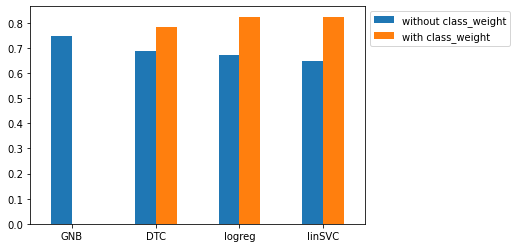

In [58]:
#comparison: tuned algorithms with and without class_weight

df = pd.DataFrame({'without class_weight': [0.747795414462081, 0.6877865777407253, 0.6719865602687947, 0.6485799067401441],
                   'with class_weight':[0, 0.7842453816660858, 0.8245481927710843 ,0.8232267548695333] }, 
                  index=['GNB', 'DTC', 'logreg', 'linSVC'])
ax = df.plot.bar(rot=0)
ax.legend(bbox_to_anchor=(1.0, 1.0))